# Formant Frequencies

# Measuring Formants

## Import modules

In [1]:
import parselmouth
from parselmouth.praat import call

## Load the sound into Parselmouth-Praat

In [2]:
sound = parselmouth.Sound("03-01-01-01-01-01-01.wav")
print(sound)

Object type: Sound
Object name: <no name>
Date: Tue Feb  4 14:32:08 2020

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 3.3032916666666665 seconds
   Total duration: 3.3032916666666665 seconds
Time sampling:
   Number of samples: 158558
   Sampling period: 2.0833333333333333e-05 seconds
   Sampling frequency: 48000 Hz
   First sample centred at: 1.0416666666666666e-05 seconds
Amplitude:
   Minimum: -0.0384216309 Pascal
   Maximum: 0.0405883789 Pascal
   Mean: 9.14999977e-07 Pascal
   Root-mean-square: 0.00400063537 Pascal
Total energy: 5.28694585e-05 Pascal² sec (energy in air: 1.32173646e-07 Joule/m²)
Mean power (intensity) in air: 4.00127084e-08 Watt/m² = 46.02 dB
Standard deviation in channel 1: 0.00400064788 Pascal



## Measure the formants

### Analysis parameters matter
- Maximum Formant
    - This is the highest frequency a formant could be
    - Children's voices - 7000 Hz, 8000 Hz
    - Adult voices
        - Lower pitched voices use 5000
        - Higher pitched voices use 5500
    - Our cutoff will be 120 Hz or about the average male voice pitch

In [5]:
formant_object = sound.to_formant_burg(maximum_formant=5000)
print(formant_object)

Object type: Formant
Object name: <no name>
Date: Tue Feb  4 14:32:33 2020

Time domain:
   Start time: 0 seconds
   End time: 3.3032916666666665 seconds
   Total duration: 3.3032916666666665 seconds
Time sampling:
   Number of frames: 521
   Time step: 0.00625 seconds
   First frame centred at: 0.026645833333333258 seconds



In [8]:
f1 = call(formant_object, "Get mean", 1, 0, 0, "Hertz")
f2 = call(formant_object, "Get mean", 2, 0, 0, "Hertz")
f3 = call(formant_object, "Get mean", 3, 0, 0, "Hertz")
f4 = call(formant_object, "Get mean", 4, 0, 0, "Hertz")
print(f'f1: {f1}')
print(f'f2: {f2}')
print(f'f3: {f3}')
print(f'f4: {f4}')

f1: 778.960860471338
f2: 1791.3513282858835
f3: 2732.7058369935444
f4: 3699.789424908399


In [9]:
pitch = sound.to_pitch()
mean_pitch = call(pitch, "Get mean", 0, 0, "Hertz")
print(mean_pitch)

111.84901197921828


### `if` the voice pitch is low, use `5000`; `elif` the voice pitch is high, use `5500`

In [11]:
def measure_formants(sound):
    pitch = sound.to_pitch()
    mean_pitch = call(pitch, "Get mean", 0, 0, "Hertz")
    if mean_pitch < 120:
        max_formant = 5000
    elif mean_pitch >= 120:
        max_formant = 5500
    else:
        max_formant = 5500  # It's always good to have a fallback value just in case
    return max_formant


In [12]:
max_formant = measure_formants(sound)
formant_object = sound.to_formant_burg(maximum_formant=max_formant)
f1 = call(formant_object, "Get mean", 1, 0, 0, "Hertz")
f2 = call(formant_object, "Get mean", 2, 0, 0, "Hertz")
f3 = call(formant_object, "Get mean", 3, 0, 0, "Hertz")
f4 = call(formant_object, "Get mean", 4, 0, 0, "Hertz")
print(f'formant 1: {f1}')
print(f'f2: {f2}')
print(f'f3: {f3}')
print(f'f4: {f4}')

formant 1: 778.960860471338
f2: 1791.3513282858835
f3: 2732.7058369935444
f4: 3699.789424908399


In [13]:
measure_formants(sound)

5000

# F1 F2 plots

## Import modules

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import seaborn as sns
import numpy as np

%matplotlib inline

## Get formant database from Praat

In [15]:
peterson_barney = call("Create formant table (Peterson & Barney 1952)")
call(peterson_barney, "Save as comma-separated file", "peterson_barney.csv")
peterson_barney = pd.read_csv('peterson_barney.csv')

## View the top 5 rows of your data file using pandas

In [16]:
peterson_barney.head()

,Type,Sex,Speaker,Vowel,IPA,F0,F1,F2,F3
0,m,m,1,iy,i,160,240,2280,2850
1,m,m,1,iy,i,186,280,2400,2790
2,m,m,1,ih,\ic,203,390,2030,2640
3,m,m,1,ih,\ic,192,310,1980,2550
4,m,m,1,eh,\ef,161,490,1870,2420


## Convert Hz to Bark

Bark corresponds to the tonotopic map of the cochlea

In [17]:
def hz_to_bark(hz):
    bark = 7 * np.log(hz/650 + np.sqrt(1 + (hz/650)**2))
    return bark

In [18]:
peterson_barney['F1 Bark'] = hz_to_bark(peterson_barney['F1'])
peterson_barney['F2 Bark'] = hz_to_bark(peterson_barney['F2'])

In [19]:
peterson_barney.head()

,Type,Sex,Speaker,Vowel,IPA,F0,F1,F2,F3,F1 Bark,F2 Bark
0,m,m,1,iy,i,160,240,2280,2850,2.529223,13.774821
1,m,m,1,iy,i,186,280,2400,2790,2.929150,14.120762
2,m,m,1,ih,\ic,203,390,2030,2640,3.981774,12.996652
3,m,m,1,ih,\ic,192,310,1980,2550,3.223336,12.830590
4,m,m,1,eh,\ef,161,490,1870,2420,4.873549,12.451533


## This code is from `matplotlib` and will draw ellipses around our vowels

You don't need to know how this works, just know how to run it.  One cool thing about Python is being able to reuse other people's code without reinventing the wheel.

<img src="img/python_comic.png">

In [20]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

## Make an F1 F2 plot

Here is the code in steps, so I can explain what each line does.  It won't really work unless it's in 1 code cell

### We are going to overlay the plot of each vowel on the figure, so we need to create sublots first.

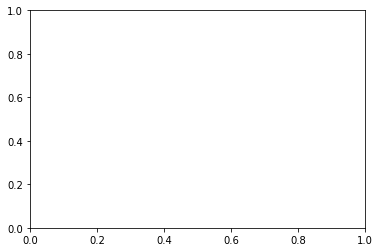

In [21]:
fig, ax_kwargs = plt.subplots()

### Make the ellipses grey

In [22]:
ax_kwargs.axvline(c='grey', lw=1)
ax_kwargs.axhline(c='grey', lw=1)

### Make a list of colours so that each vowel is a different colour

In [23]:
colours = ['g', 'r', 'y', 'k', 'b', 'm', 'w']

### Make a `set` of all the vowels
A set is like a list, except it contains only unique items.  We're doing this to get a set of unique values from the `Vowel` column in the `peterson_barney` dataframe.  That column has a lot more than 1 example for each vowel.
- You can use `union`, and `intersection` with sets

In [24]:
vowels = set(peterson_barney["Vowel"])

### Make a `for` loop to plot F1 and F2 of each vowel
Also, plot those ellipses

In [25]:
for vowel in vowels:
    x = peterson_barney['F1 Bark'][peterson_barney['Vowel'] == vowel] 
    y = peterson_barney['F2 Bark'][peterson_barney['Vowel'] == vowel]
    confidence_ellipse(x, y, ax_kwargs, n_std=2,
        alpha=0.3, facecolor='pink', edgecolor='black', zorder=0)
    ax_kwargs.scatter(x, y, s=3)

### Set the figure title

In [26]:
ax_kwargs.set_title(f'F1 F2 plot')

Text(0.5, 1, 'F1 F2 plot')

### Change X and Y axis limits

(0, 1.0)

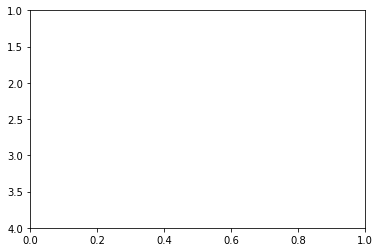

In [27]:
plt.ylim(bottom=4)
plt.xlim(left=0)

### Label the X and Y axes

In [28]:
ax_kwargs.set_xlabel("F1 Bark")
ax_kwargs.set_ylabel("F2 Bark")

Text(3.200000000000003, 0.5, 'F2 Bark')

### Final adjustments and show the figure

In [29]:
fig.subplots_adjust(hspace=0.25)
fig1 = plt.gcf()
plt.show()

<Figure size 432x288 with 0 Axes>

### Here's all that code together with a working plot

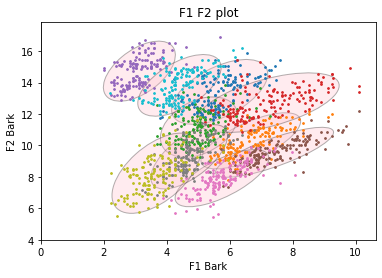

In [30]:
fig, ax_kwargs = plt.subplots()

ax_kwargs.axvline(c='grey', lw=1)
ax_kwargs.axhline(c='grey', lw=1)

colours = ['g', 'r', 'y', 'k', 'b', 'm', 'w']
vowels = set(peterson_barney["Vowel"])

for vowel in vowels:
    x = peterson_barney['F1 Bark'][peterson_barney['Vowel'] == vowel] 
    y = peterson_barney['F2 Bark'][peterson_barney['Vowel'] == vowel]
    confidence_ellipse(x, y, ax_kwargs, n_std=2,
        alpha=0.3, facecolor='pink', edgecolor='black', zorder=0)
    ax_kwargs.scatter(x, y, s=3)
ax_kwargs.set_title(f'F1 F2 plot')

plt.ylim(bottom=4)
plt.xlim(left=0)

ax_kwargs.set_xlabel("F1 Bark")
ax_kwargs.set_ylabel("F2 Bark")

fig.subplots_adjust(hspace=0.25)
fig1 = plt.gcf()
plt.show()

# Plotting formant frequencies on a Spectrogram

## Re-use our spectrogram code from the previous labs

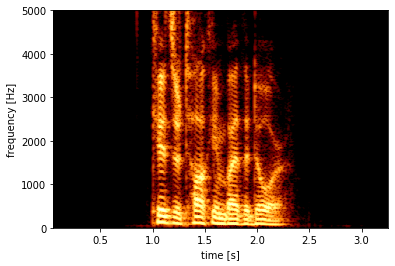

In [31]:
def draw_spectrogram(spectrogram, dynamic_range=70, cmap='afmhot'):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap=cmap)
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

spectrogram = sound.to_spectrogram(window_length=0.05)
draw_spectrogram(spectrogram)

### Find the times at which we measured formants

In [32]:
formants = sound.to_formant_burg(maximum_formant=5000)
sample_times = formant.xs()

NameError: name 'formant' is not defined

### Measure intensity so we plot formants only where there is sound

The algorithm calculates formants even when they aren't there

In [33]:
intensity = sound.to_intensity()

### For each of the four formants do these things...

You can also use numbers in a for loop.  
The `range` function here does each operation from values starting at 1, and ending at 5, but not including 5.  
Each time we go through the loop, `i` gets incremented 1 higher, so in this loop it gets:  
1  
2  
3  
4

In [34]:
for i in range(1, 5):

SyntaxError: unexpected EOF while parsing (<ipython-input-34-ace76ddc38d4>, line 1)

1) Convert formant values from Praat formant to `numpy` format.

In [35]:
    formant_values = call(formants, "To Matrix", i).values[0, :]

NameError: name 'i' is not defined

2) Go through each formant measurement over time

The `enumerate` function in Python allows us to mix words and numbers in `for` loops.  
We are going to assign `j` one number higher, starting at `1` each time we go through the loop.  
We are going to assign each `sample_time` to the `time` variable each time we go through the loop.

In [36]:
    for j, time in enumerate(sample_times, 1):

SyntaxError: unexpected EOF while parsing (<ipython-input-36-862e61094c41>, line 1)

#### Measure intensity at each time that we measured formants

In [37]:
        intensity_value = call(intensity, "Get value at time", time, "cubic")

NameError: name 'time' is not defined

#### If those intensity values are too soft, discard the formant measurement so we don't plot formants on empty sound

In [38]:
        if intensity_value < 50:
            formant_values[j] = 0
        formant_values[formant_values == 0] = np.nan

NameError: name 'intensity_value' is not defined

#### Plot the formant values in red with white background

In [39]:
    plt.scatter(sample_times, formant_values, c='w', linewidth=3, marker='o', s=2)
    plt.scatter(sample_times, formant_values, c='r', linewidth=1, s=2)

NameError: name 'sample_times' is not defined

#### Turn off grids

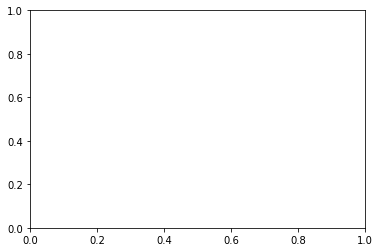

In [40]:
    plt.grid(False)

### Here's that code all together in 1 cell so it works nicely to produce a high-quality spectrogram

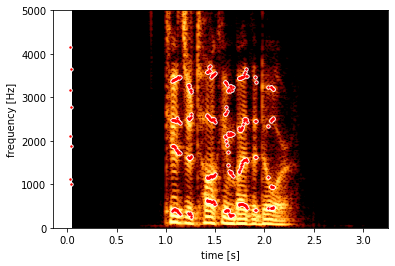

In [41]:
spectrogram = sound.to_spectrogram(window_length=0.05)
draw_spectrogram(spectrogram)

sample_times = formants.xs()
intensity = sound.to_intensity()
for i in range(1,5):
    formant_values = call(formants, "To Matrix", i).values[0, :]
    for j, time in enumerate(sample_times, 1):
        intensity_value = call(intensity, "Get value at time", time, "cubic")
        if intensity_value < 50:
            formant_values[j] = 0
    formant_values[formant_values == 0] = np.nan
    plt.scatter(sample_times, formant_values, c='w', linewidth=3, marker='o', s=2)
    plt.scatter(sample_times, formant_values, c='r', linewidth=1, s=2)
    plt.grid(False)
